In [2]:
import pandas as pd

currency = pd.read_csv('USDvsCAD.csv')
currency

,Year,USD/CAD,diff,USD Perform better than CAD
0,2000,1.485280,1.570885,True
1,2001,1.547925,-0.062645,False
2,2002,1.570885,-0.022960,False
3,2003,1.395450,0.175435,True
4,2004,1.300730,0.094720,True
5,2005,1.210707,0.090023,True
6,2006,1.134390,0.076317,True
7,2007,1.074387,0.060003,True
8,2008,1.065788,0.008599,True
9,2009,1.141433,-0.075645,False


In [3]:
unemployment = pd.read_csv('unemployment.csv').drop(['Country Name'], axis=1)
df = unemployment.transpose()
df.columns = ['canada', 'usa']
df['canada'] = df['canada'].astype(float)
df['usa'] = df['usa'].astype(float)
unemploy_diff = df['canada'].subtract(df['usa']).T
unemploy_diff


2000    2.837
2001    2.488
2002    1.882
2003    1.585
2004    1.656
2005    1.674
2006    1.861
2007    1.534
2008    0.500
2009   -0.794
2010   -1.455
2011   -1.312
2012   -0.677
2013   -0.232
2014    0.855
2015    1.665
2016    2.169
2017    2.071
2018    1.941
2019    2.021
2020    1.602
2021    2.178
2022    1.630
dtype: float64

[[1.         0.26925626]
 [0.26925626 1.        ]]


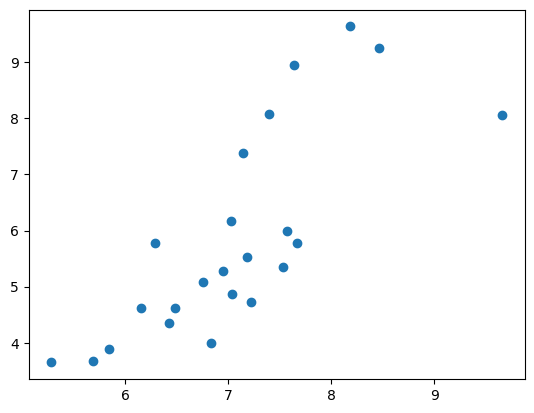

In [4]:
import numpy as np
import matplotlib.pyplot as plt
print(np.corrcoef(unemploy_diff, currency['diff']))
plt.scatter(df['canada'], df['usa'])
plt.show()

In [5]:
employment = pd.read_csv('Employment.csv').drop(['Country Name'], axis=1)
employment

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,61.269,61.151,61.739,62.446,62.637,62.601,62.677,63.286,63.317,61.414,...,61.715,61.358,61.264,61.084,61.532,61.59,61.971,57.836,60.170,61.568
1,63.297,62.519,61.548,61.066,61.164,61.516,61.921,61.752,61.005,58.200,...,57.845,58.351,58.785,59.181,59.590,59.94,60.329,56.380,57.946,59.266


In [6]:
df2 = employment.transpose()
df2.columns = ['canada', 'usa']
df2['canada'] = df2['canada'].astype(float)
df2['usa'] = df2['usa'].astype(float)
employ_diff = df2['canada'].subtract(df2['usa']).T
employ_diff

2000   -2.028
2001   -1.368
2002    0.191
2003    1.380
2004    1.473
2005    1.085
2006    0.756
2007    1.534
2008    2.312
2009    3.214
2010    4.068
2011    4.287
2012    3.834
2013    3.870
2014    3.007
2015    2.479
2016    1.903
2017    1.942
2018    1.650
2019    1.642
2020    1.456
2021    2.224
2022    2.302
dtype: float64

[[ 1.         -0.53902251]
 [-0.53902251  1.        ]]


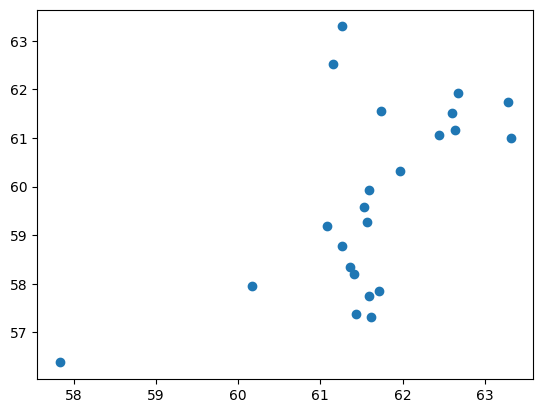

In [7]:
print(np.corrcoef(employ_diff, currency['diff']))
plt.scatter(df2['canada'], df2['usa'])
plt.show()

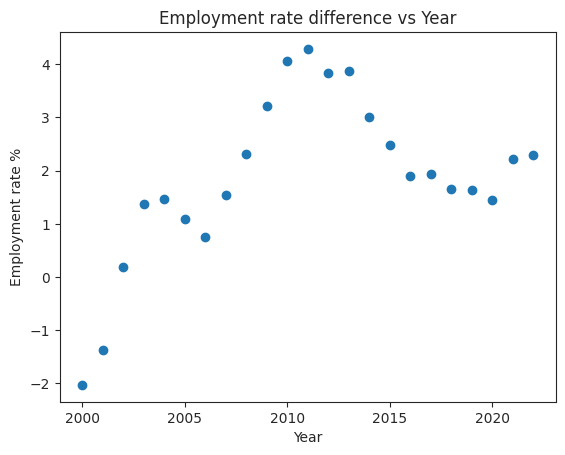

In [29]:
plt.scatter(currency['Year'], employ_diff )
plt.title('Employment rate difference vs Year')
plt.xlabel('Year')
plt.ylabel('Employment rate %')
plt.show()

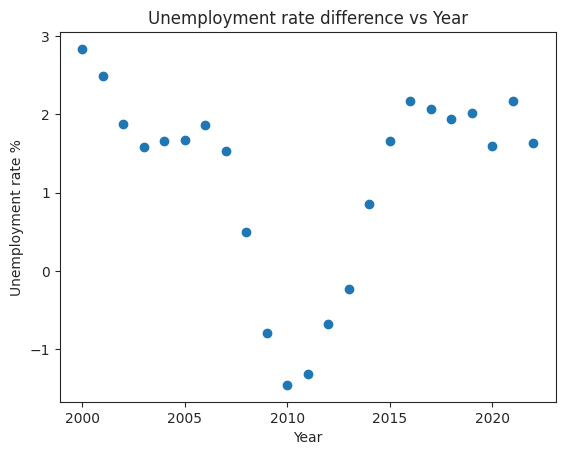

In [28]:
plt.scatter(currency['Year'], unemploy_diff )
plt.title('Unemployment rate difference vs Year')
plt.xlabel('Year')
plt.ylabel('Unemployment rate %')
plt.show()

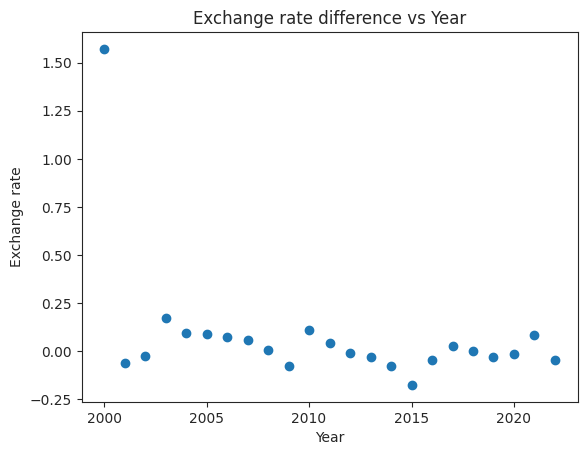

In [30]:
plt.scatter(currency['Year'], currency['diff'])
plt.title('Exchange rate difference vs Year')
plt.xlabel('Year')
plt.ylabel('Exchange rate')
plt.show()

In [22]:
Data = {
    'exchange': currency['diff'],
    'unemploy': unemploy_diff.reset_index()[0],
    'employ': employ_diff.reset_index()[0],
}
regression_data = pd.DataFrame(Data)

[[ 1.         -0.53902251]
 [-0.53902251  1.        ]]
[[1.         0.26925626]
 [0.26925626 1.        ]]


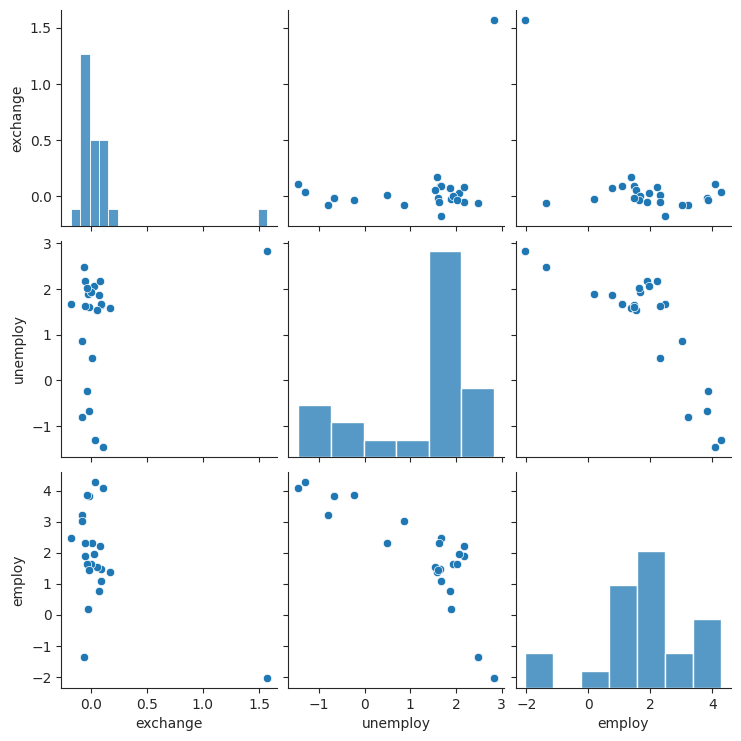

In [12]:
import seaborn as sns
import statsmodels.formula.api as smf
sns.set_style(style='ticks')
sns.pairplot(regression_data)
print(np.corrcoef(regression_data['exchange'], regression_data['employ']))
print(np.corrcoef(regression_data['exchange'], regression_data['unemploy']))
plt.show()


In [23]:

employ_regression = smf.ols(formula='exchange ~ employ', data=regression_data).fit()
print(employ_regression.summary())

                            OLS Regression Results                            
Dep. Variable:               exchange   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     8.600
Date:                Sat, 22 Jun 2024   Prob (F-statistic):            0.00795
Time:                        07:29:46   Log-Likelihood:                -3.0110
No. Observations:                  23   AIC:                             10.02
Df Residuals:                      21   BIC:                             12.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2934      0.095      3.075      0.0

In [24]:
unemploy_regression = smf.ols(formula='exchange ~ unemploy', data=regression_data).fit()
print(unemploy_regression.summary())

                            OLS Regression Results                            
Dep. Variable:               exchange   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.641
Date:                Sat, 22 Jun 2024   Prob (F-statistic):              0.214
Time:                        07:29:52   Log-Likelihood:                -6.0929
No. Observations:                  23   AIC:                             16.19
Df Residuals:                      21   BIC:                             18.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0111      0.097     -0.115      0.9

In [15]:
unemploy_regression = smf.ols(formula='exchange ~ unemploy + employ', data=regression_data).fit()
print(unemploy_regression.summary())

                            OLS Regression Results                            
Dep. Variable:               exchange   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     6.032
Date:                Sat, 22 Jun 2024   Prob (F-statistic):            0.00892
Time:                        07:26:10   Log-Likelihood:                -1.5305
No. Observations:                  23   AIC:                             9.061
Df Residuals:                      20   BIC:                             12.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6229      0.219      2.846      0.0

In [26]:
unemploy_regression = smf.ols(formula='exchange ~ unemploy + employ + unemploy:employ', data=regression_data).fit()
print(unemploy_regression.summary())

                            OLS Regression Results                            
Dep. Variable:               exchange   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     8.559
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           0.000841
Time:                        07:30:03   Log-Likelihood:                 2.8741
No. Observations:                  23   AIC:                             2.252
Df Residuals:                      19   BIC:                             6.794
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5497      0.435     

In [17]:
employ_regression = smf.ols(formula='exchange ~ employ', data=regression_data).fit()
print(employ_regression.summary())

                            OLS Regression Results                            
Dep. Variable:               exchange   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     8.600
Date:                Sat, 22 Jun 2024   Prob (F-statistic):            0.00795
Time:                        07:26:11   Log-Likelihood:                -3.0110
No. Observations:                  23   AIC:                             10.02
Df Residuals:                      21   BIC:                             12.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2934      0.095      3.075      0.0